# 원천 이미지에서 신호등 영역만 추출

## 하나의 이미지로 테스트 
파일명 : 14959040.jpg (paths 경로에 넣어두기)

In [350]:
def green(img,name,X,Y,W,H):
    global seq, path_g,path
    
    ## 파일 불러오기
    B = cv2.imread(img, cv2.IMREAD_COLOR)
    name = name.split('.')
    
    # ROI 지정
    roi = B[Y:Y+H, X:X+W]
    roi2 = roi.copy()    

    ## 초록색 부분 추출
    # hsv 영역 전환
    roi2_hsv = cv2.cvtColor(roi2, cv2.COLOR_BGR2HSV)

    # 색 범위 지정
    low = (43, 40, 120)
    up = (95, 255, 255)

    # 범위내의 픽셀들은 흰색, 나머지 검은색
    roi2_mask = cv2.inRange(roi2_hsv, low, up)
    
    # 바이너리 이미지를 마스크로 사용하여 원본이미지에서 범위값에 해당하는 영상부분을 획득
    roi2_result = cv2.bitwise_and(roi2, roi2, mask = roi2_mask)
    
    plt.imshow(roi2_result)
    plt.show()
    
    ## 모폴 침식 사용
    # 구조화 요소 커널, 사각형 (2x2) 생성 # 3x3으로 수정 yjlim
    k = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    
    # 열림 연산 적용 # yjlim 추가
    erosion1 = cv2.morphologyEx(roi2_result, cv2.MORPH_OPEN, k)
    
    # 침식 연산 적용
    erosion2 = cv2.erode(roi2_result, k)
    
    erosion3 = erosion1.copy()

    ## 색 영역 변환
    # FindContours support only 8uC1 and 32sC1 images,
    # HSV 이미지는 contour 기능을 쓸 수 없으므로 HSV->BGR->GRAY 로 전환하자
    erosion3 = cv2.cvtColor(erosion3, cv2.COLOR_HSV2BGR)    
    erosion3 = cv2.cvtColor(erosion3, cv2.COLOR_BGR2GRAY)
    

    ## contour 직사각형으로 출력
    position = []
    contours, hierarchy = cv2.findContours(erosion3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        # cnt를 일일이 확인해서 좌표상으로 크게 차이 안나는 것들(잡음)은 추가안함(너무 작은 직사각형, 한쪽으로 길쭉한 직사각형 제외)
        if (w >= 8) and (h >= 8) and (abs(w - h) <= 4):
            cv2.rectangle(erosion3, (x, y), (x + w, y + h), (255, 0, 0), 1)
            position.append((x, y, w, h))
            
    ## 추출한 신호등만 별도의 이미지로 저장
    if position:
        for a in position:
            # 가로, 세로 높이 비교해서 큰 값으로 길이 설정 # yjlim
            if a[2] >= a[3]:
                length = a[2]
            else:
                length = a[3]
                
            interval_x = int(length / 3) # 너비 3등분
            interval_y = int(a[3] / 3) # 높이 3등분
            
            if a[1] - interval_y > 0 and X + a[0] - 2 * length - 2 * interval_x > 0:
                real3 = B[a[1] - interval_y:a[1] + a[3] + interval_y,\
                        X + a[0] - 2 * length - 2 * interval_x:X + a[0] + length + interval_x]
                print(img +'///G' + str(seq) + '.jpg')
                first_detect.append([[a[1] - interval_y, a[1] + a[3] + interval_y, X + a[0] - 2 * length - 2 * interval_x, X + a[0] + length + interval_x], name[0] + '_' + str(seq)])
                cv2.imwrite(path+ name[0]+'_'+str(seq) + '.jpg', real3)
                seq = seq + 1

In [351]:
def yellow(img,name,X,Y,W,H):
    global seq, path_y, path
    
    name = name.split('.')
    
    ## 파일 불러오기
    B = cv2.imread(img, cv2.IMREAD_COLOR)
    
    # ROI 지정
    roi = B[Y:Y+H,X:X+W]
    roi2 = roi.copy()

    ## 노랑색 부분 추출
    # hsv 영역 전환
    roi2_hsv = cv2.cvtColor(roi2, cv2.COLOR_BGR2HSV)

    # 색 범위 지정
    low = (10, 10, 110)
    up = (31, 255, 255)
    # low = (20, 20, 100)
    # up = (30, 255, 255)

    roi2_mask = cv2.inRange(roi2_hsv, low, up)
    roi2_result = cv2.bitwise_and(roi2, roi2, mask=roi2_mask)
    
    plt.imshow(roi2_result)
    plt.show()

    ## 모폴 침식 사용
    # 구조화 요소 커널, 사각형 (2x2) 생성
    k = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    
    # 열림 연산 적용 # yjlim 추가
    erosion1 = cv2.morphologyEx(roi2_result, cv2.MORPH_OPEN, k)
    
    # 침식 연산 적용
    erosion = cv2.erode(roi2_result, k)
    
    erosion3 = erosion1.copy()

    
    ## 색 영역 변환
    # FindContours support only 8uC1 and 32sC1 images,
    # HSV 이미지는 contour 기능을 쓸 수 없으므로 HSV->BGR->GRAY 로 전환하자
    erosion3 = cv2.cvtColor(erosion3, cv2.COLOR_HSV2BGR)
    erosion3 = cv2.cvtColor(erosion3, cv2.COLOR_BGR2GRAY)

    ## contour 직사각형으로 출력
    position = []
    contours, hierarchy = cv2.findContours(erosion3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        # cnt를 일일이 확인해서 좌표상으로 크게 차이 안나는 것들(잡음)은 추가안함(너무 작은 직사각형, 한쪽으로 길쭉한 직사각형 제외)
        if (w >= 8) and (h >= 8) and (abs(w - h) <= 4):
            cv2.rectangle(erosion3, (x, y), (x + w, y + h), (255, 0, 0), 1)
            position.append((x, y, w, h))

    ## 추출한 신호등만 별도의 이미지로 저장
    if position:
        for a in position:
            # 가로, 세로 높이 비교해서 큰 값으로 길이 설정 # yjlim
            if a[2] >= a[3]:
                length = a[2]
            else:
                length = a[3]
                
            interval_x = int(length / 3) # 너비 3등분
            interval_y = int(a[3] / 3) # 높이 3등분
            
            if a[1] - interval_y > 0 and X + a[0] - length - interval_x > 0:
                real3 = B[a[1] - interval_y:a[1] + a[3] + interval_y,
                        X + a[0] - length - interval_x:X + a[0] + 2 * length + interval_x]
                
                print(img + '///Y' + str(seq) + '.jpg')
                first_detect.append([[a[1] - interval_y,a[1] + a[3] + interval_y,X + a[0] - length - interval_x,X + a[0] + length + interval_x], name[0] + '_' + str(seq)])
                cv2.imwrite(path + name[0]+'_'+str(seq) + '.jpg', real3)
                seq = seq + 1

In [352]:
def red(img, name, X, Y, W, H):
    global seq, path_r,path
    
    name = name.split('.')
    
    ## 파일 불러오기
    B = cv2.imread(img, cv2.IMREAD_COLOR)
    
    # ROI 지정
    roi = B[Y:Y+H,X:X+W]
    roi2 = roi.copy()

    ## 빨강색 부분 추출
    # hsv 영역 전환
    roi2_hsv = cv2.cvtColor(roi2, cv2.COLOR_BGR2HSV)

    # 색 범위 지정
    low = (0, 30, 50)
    up = (10, 255, 255)
    
    #low = (11, 50, 50)
    #up = (30, 200, 200)
    
    roi2_mask = cv2.inRange(roi2_hsv, low, up)
    roi2_result = cv2.bitwise_and(roi2, roi2, mask = roi2_mask)
    
    plt.imshow(roi2_result)
    plt.show()

    ## 모폴 침식 사용
    # 구조화 요소 커널, 사각형 (2x2) 생성
    k = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    
    # 열림 연산 적용 # yjlim 추가
    erosion1 = cv2.morphologyEx(roi2_result, cv2.MORPH_OPEN, k)
    
    # 침식 연산 적용
    erosion = cv2.erode(roi2_result, k)
    
    erosion3 = erosion1.copy()

    ## 색 영역 변환
    # FindContours support only 8uC1 and 32sC1 images,
    # HSV 이미지는 contour 기능을 쓸 수 없으므로 HSV->BGR->GRAY 로 전환하자
    erosion3 = cv2.cvtColor(erosion3, cv2.COLOR_HSV2BGR)
    erosion3 = cv2.cvtColor(erosion3, cv2.COLOR_BGR2GRAY)

    ## contour 직사각형으로 출력
    position = []
    contours, hierarchy = cv2.findContours(erosion3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        # cnt를 일일이 확인해서 좌표상으로 크게 차이 안나는 것들(잡음)은 추가안함(너무 작은 직사각형, 한쪽으로 길쭉한 직사각형 제외)
        if (w >= 8) and (h >= 8) and (abs(w - h) <= 4):
            cv2.rectangle(erosion3, (x, y), (x + w, y + h), (255, 0, 0), 1)
            position.append((x, y, w, h))

    ## 추출한 신호등만 별도의 이미지로 저장
    if position:
        for a in position:
            # 가로, 세로 높이 비교해서 큰 값으로 길이 설정 # yjlim
            if a[2] >= a[3]:
                length = a[2]
            else:
                length = a[3]
                
            interval_x = int(length / 3) # 너비 3등분
            interval_y = int(a[3] / 3) # 높이 3등분
            
            if a[1] - interval_y > 0 and X + a[0] - interval_x > 0:
                real3 = B[a[1] - interval_y:a[1] + a[3] + interval_y,
                        X + a[0] - interval_x:X + a[0] + 3 * length + 2 * interval_x]
                print(img + '///R' + str(seq) + '.jpg')
                first_detect.append([[a[1] - interval_y,a[1] + a[3] + interval_y, X + a[0] - interval_x,X + a[0] + 3*length + 2 * interval_x], name[0] + '_' + str(seq)])
                cv2.imwrite(path + name[0] +'_'+ str(seq) + '.jpg', real3)
                seq = seq + 1
    else:
        ## 빨강색 부분 추출2
        # 다시 hsv 영역 전환
        roi2_hsv = cv2.cvtColor(roi2, cv2.COLOR_BGR2HSV)

        # 색 범위 지정2
        low = (150, 40, 50)
        up = (180, 255, 255)

        roi2_mask = cv2.inRange(roi2_hsv, low, up)
        roi2_result = cv2.bitwise_and(roi2, roi2, mask=roi2_mask)

        ## 모폴 침식 사용
        # 구조화 요소 커널, 사각형 (2x2) 생성
        k = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        
        # 열림 연산 적용 # yjlim 추가
        erosion1 = cv2.morphologyEx(roi2_result, cv2.MORPH_OPEN, k)
        
        # 침식 연산 적용
        erosion = cv2.erode(roi2_result, k)
        
        erosion3 = erosion1.copy()

        ## 색 영역 변환
        # FindContours support only 8uC1 and 32sC1 images,
        # HSV 이미지는 contour 기능을 쓸 수 없으므로 HSV->BGR->GRAY 로 전환하자
        erosion3 = cv2.cvtColor(erosion3, cv2.COLOR_HSV2BGR)
        erosion3 = cv2.cvtColor(erosion3, cv2.COLOR_BGR2GRAY)

        ## contour 직사각형으로 출력
        position = []
        contours, hierarchy = cv2.findContours(erosion3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            # cnt를 일일이 확인해서 좌표상으로 크게 차이 안나는 것들(잡음)은 추가안함(너무 작은 직사각형, 한쪽으로 길쭉한 직사각형 제외)
            if (w >= 8) and (h >= 8) and (abs(w - h) <= 4):
                cv2.rectangle(erosion3, (x, y), (x + w, y + h), (255, 0, 0), 1)
                position.append((x, y, w, h))

        if position:
            for a in position:
                # 가로, 세로 높이 비교해서 큰 값으로 길이 설정 # yjlim
                if a[2] >= a[3]:
                    length = a[2]
                else:
                    length = a[3]

                interval_x = int(length / 3) # 너비 3등분
                interval_y = int(a[3] / 3) # 높이 3등분
                
                if a[1] - interval_y > 0 and X + a[0] - interval_x > 0:
                    real3 = B[a[1] - interval_y:a[1] + a[3] + interval_y,
                            X + a[0] - interval_x:X + a[0] + 3 * length + 2 * interval_x]
                    
                    print(img + '///R' + str(seq) + '.jpg')
                    first_detect.append([[a[1] - interval_y,a[1] + a[3] + interval_y, X + a[0] - interval_x,X + a[0] + 3 * length + 2 * interval_x],name[0]+'_'+str(seq)])
                    cv2.imwrite(path + name[0]+'_'+str(seq) + '.jpg', real3)
                    seq = seq + 1

In [353]:
import cv2
import matplotlib.pyplot as plt

## green yellow red 모델들

# 파일명 시작 숫자 설정
seq = 1 # 채번 변수 통일 20220308 by yjlim

# 추출 이미지 저장 위치 설정
# 이미지 한장으로 테스트 하는 거라서 디렉토리 분류 할 필요 없이 한 폴더에 다 담기
path = './vali_data/'

first_detect = []

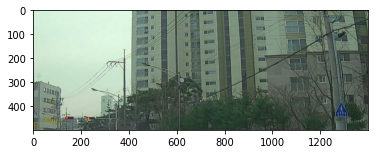

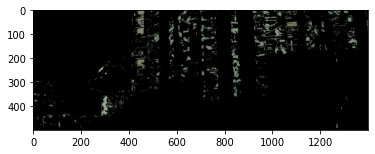

./trainingData/training/test/14959040.jpg///G1.jpg
./trainingData/training/test/14959040.jpg///G2.jpg
./trainingData/training/test/14959040.jpg///G3.jpg
./trainingData/training/test/14959040.jpg///G4.jpg
./trainingData/training/test/14959040.jpg///G5.jpg
./trainingData/training/test/14959040.jpg///G6.jpg
./trainingData/training/test/14959040.jpg///G7.jpg
./trainingData/training/test/14959040.jpg///G8.jpg
./trainingData/training/test/14959040.jpg///G9.jpg
./trainingData/training/test/14959040.jpg///G10.jpg
./trainingData/training/test/14959040.jpg///G11.jpg
./trainingData/training/test/14959040.jpg///G12.jpg
./trainingData/training/test/14959040.jpg///G13.jpg
./trainingData/training/test/14959040.jpg///G14.jpg
./trainingData/training/test/14959040.jpg///G15.jpg
./trainingData/training/test/14959040.jpg///G16.jpg
./trainingData/training/test/14959040.jpg///G17.jpg
./trainingData/training/test/14959040.jpg///G18.jpg
./trainingData/training/test/14959040.jpg///G19.jpg
./trainingData/traini

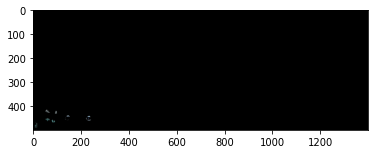

./trainingData/training/test/14959040.jpg///Y42.jpg


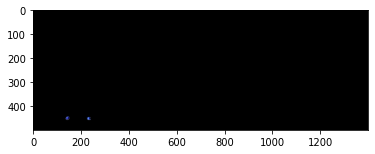

./trainingData/training/test/14959040.jpg///R43.jpg
./trainingData/training/test/14959040.jpg///R44.jpg


In [354]:
import os
# 추출 전 데이터 위치
paths = "./trainingData/training/test/"

light_list = os.listdir(paths)

for img in light_list:
    if img == ".DS_Store":
        continue
        
    img_show = cv2.imread(paths + img, cv2.IMREAD_COLOR)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    img_show = img_show[0:500, 300:1700]
    plt.imshow(img_show)
    plt.show()
    print("===========================================")
        
        
    # ROI 지정, x,y,w,h ,N 설정 완료
    # green, yellow, red 하나의 함수로 할수없는지 확인 (유민석님) ehkoo
    green(paths+img,img, X=300, Y=0, W=1400, H=500)
    yellow(paths+img,img, X=300, Y=0, W=1400, H=500)
    red(paths+img,img, X=300, Y=0, W=1400, H=500)

In [355]:
first_detect

[[[395, 410, 593, 635], '14959040_1'],
 [[372, 384, 274, 322], '14959040_2'],
 [[352, 364, 991, 1021], '14959040_3'],
 [[337, 363, 1097, 1160], '14959040_4'],
 [[330, 342, 1125, 1155], '14959040_5'],
 [[317, 332, 1116, 1152], '14959040_6'],
 [[304, 324, 1031, 1079], '14959040_7'],
 [[289, 305, 688, 727], '14959040_8'],
 [[285, 302, 1110, 1170], '14959040_9'],
 [[284, 306, 1100, 1154], '14959040_10'],
 [[265, 281, 885, 939], '14959040_11'],
 [[256, 277, 780, 834], '14959040_12'],
 [[243, 255, 1002, 1041], '14959040_13'],
 [[235, 261, 531, 597], '14959040_14'],
 [[227, 243, 732, 771], '14959040_15'],
 [[200, 242, 1059, 1173], '14959040_16'],
 [[197, 243, 660, 774], '14959040_17'],
 [[201, 217, 979, 1018], '14959040_18'],
 [[187, 218, 890, 965], '14959040_19'],
 [[180, 202, 843, 897], '14959040_20'],
 [[167, 213, 1056, 1167], '14959040_21'],
 [[153, 189, 1269, 1368], '14959040_22'],
 [[149, 176, 894, 960], '14959040_23'],
 [[145, 162, 976, 1018], '14959040_24'],
 [[138, 159, 1429, 1480], 

# 신경망 모델에 적용

In [356]:
import os
import cv2
import numpy as np
import random
from PIL import Image

from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf

## 신호등 검출 및 색 분류 모델 불러오기

In [357]:
model = tf.keras.models.load_model('traffic_light_0307.h5')

In [358]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 8, 28, 32)         896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 14, 32)        0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 4, 14, 32)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 12, 64)         18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 1, 6, 64)         

## 검출된 신호등 이미지를  입력값으로 만들기

In [359]:
Path2 = './vali_data/'
file_list = os.listdir(Path2)

if ".DS_Store" in file_list:
    file_list.remove(".DS_Store")

data2 = []

for A in file_list:
    if A == ".DS_Store":
        continue
    try:
        img2 = cv2.imread(Path2+A)
        res2 = cv2.resize(img2, dsize=(30,10), interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(Path2+A,res2)
    except Exception as e:
        print(str(e))
    
for A in file_list:
    if A == ".DS_Store":
        continue
    try:
        img3 = Image.open(Path2+A)
        data2.append(np.array(img3))
        img3.close()
    except Exception as e:
        print(str(e))

In [360]:
data2

[array([[[141, 168, 151],
         [144, 171, 154],
         [141, 170, 152],
         [142, 171, 153],
         [143, 171, 156],
         [141, 169, 154],
         [142, 169, 152],
         [140, 167, 148],
         [144, 169, 150],
         [146, 171, 150],
         [152, 177, 155],
         [162, 187, 165],
         [124, 152, 129],
         [ 85, 113,  90],
         [ 61,  91,  67],
         [ 61,  91,  67],
         [ 41,  68,  49],
         [ 94, 121, 102],
         [146, 173, 156],
         [ 93, 120, 103],
         [ 51,  78,  63],
         [112, 139, 124],
         [148, 172, 158],
         [157, 181, 165],
         [157, 181, 165],
         [150, 175, 156],
         [138, 161, 141],
         [117, 140, 120],
         [202, 225, 205],
         [217, 240, 220]],
 
        [[145, 172, 155],
         [144, 171, 154],
         [139, 168, 150],
         [142, 171, 153],
         [144, 172, 157],
         [141, 170, 152],
         [142, 169, 152],
         [142, 169, 150],
         

## 모델에 적용

In [361]:
data2 = np.asarray(data2) / 255.0
prediction = model.predict(data2)

In [362]:
prediction

array([[9.60232794e-01, 1.50401695e-02, 2.47270279e-02],
       [9.73046422e-01, 1.24775516e-02, 1.44759659e-02],
       [5.52172601e-01, 1.53498158e-01, 2.94329256e-01],
       [6.23471916e-01, 1.59910485e-01, 2.16617614e-01],
       [7.05885708e-01, 1.32308647e-01, 1.61805674e-01],
       [8.93754780e-01, 3.19976807e-02, 7.42475763e-02],
       [7.68131614e-01, 9.50750560e-02, 1.36793360e-01],
       [9.90264416e-01, 6.79076090e-03, 2.94488971e-03],
       [1.33318342e-02, 8.61832500e-01, 1.24835670e-01],
       [9.06728625e-01, 3.68260182e-02, 5.64453490e-02],
       [2.87904620e-01, 3.72257292e-01, 3.39838147e-01],
       [7.02066839e-01, 9.40099731e-02, 2.03923181e-01],
       [8.13359246e-02, 8.45784396e-02, 8.34085643e-01],
       [9.71552849e-01, 2.38332283e-02, 4.61385678e-03],
       [9.44179356e-01, 2.28595808e-02, 3.29610296e-02],
       [3.41996580e-01, 4.64082062e-01, 1.93921387e-01],
       [8.12400877e-01, 4.86004725e-02, 1.38998568e-01],
       [1.86583087e-01, 6.92842

## 결과 값

In [363]:
len(first_detect)

44

In [364]:
light_order = {0:"green",1:"red",2:"yellow",3:"unknown"}

# 신호등 파일명과 색을 한 리스트에 담기 
detect_img = [] 

for i, x in enumerate(prediction):
    count = 0
    for y in x:
        if y > 0.999:
            count += 1
            
    if count > 0:
        print(str(i)+"번째 신호등: " + file_list[i] + " : " + light_order[np.argmax(x)])
        detect_img.append([file_list[i],light_order[np.argmax(x)]])
    else:
        print(str(i)+"번째 신호등: " + file_list[i] + " : " + light_order[3])

0번째 신호등: 14959040_1.jpg : unknown
1번째 신호등: 14959040_10.jpg : unknown
2번째 신호등: 14959040_11.jpg : unknown
3번째 신호등: 14959040_12.jpg : unknown
4번째 신호등: 14959040_13.jpg : unknown
5번째 신호등: 14959040_14.jpg : unknown
6번째 신호등: 14959040_15.jpg : unknown
7번째 신호등: 14959040_16.jpg : unknown
8번째 신호등: 14959040_17.jpg : unknown
9번째 신호등: 14959040_18.jpg : unknown
10번째 신호등: 14959040_19.jpg : unknown
11번째 신호등: 14959040_2.jpg : unknown
12번째 신호등: 14959040_20.jpg : unknown
13번째 신호등: 14959040_21.jpg : unknown
14번째 신호등: 14959040_22.jpg : unknown
15번째 신호등: 14959040_23.jpg : unknown
16번째 신호등: 14959040_24.jpg : unknown
17번째 신호등: 14959040_25.jpg : unknown
18번째 신호등: 14959040_26.jpg : unknown
19번째 신호등: 14959040_27.jpg : unknown
20번째 신호등: 14959040_28.jpg : unknown
21번째 신호등: 14959040_29.jpg : unknown
22번째 신호등: 14959040_3.jpg : unknown
23번째 신호등: 14959040_30.jpg : unknown
24번째 신호등: 14959040_31.jpg : unknown
25번째 신호등: 14959040_32.jpg : unknown
26번째 신호등: 14959040_33.jpg : unknown
27번째 신호등: 14959040_34.jpg : unknown
28번째 

In [365]:
detect_img

[['14959040_43.jpg', 'red'], ['14959040_44.jpg', 'red']]

In [366]:
print(len(file_list),len(first_detect)) # 모델에 적용한 이미지 39개, 이미지 검출 코드에서 나온거 42개 개수가 다름

44 44


In [367]:
first_detect

[[[395, 410, 593, 635], '14959040_1'],
 [[372, 384, 274, 322], '14959040_2'],
 [[352, 364, 991, 1021], '14959040_3'],
 [[337, 363, 1097, 1160], '14959040_4'],
 [[330, 342, 1125, 1155], '14959040_5'],
 [[317, 332, 1116, 1152], '14959040_6'],
 [[304, 324, 1031, 1079], '14959040_7'],
 [[289, 305, 688, 727], '14959040_8'],
 [[285, 302, 1110, 1170], '14959040_9'],
 [[284, 306, 1100, 1154], '14959040_10'],
 [[265, 281, 885, 939], '14959040_11'],
 [[256, 277, 780, 834], '14959040_12'],
 [[243, 255, 1002, 1041], '14959040_13'],
 [[235, 261, 531, 597], '14959040_14'],
 [[227, 243, 732, 771], '14959040_15'],
 [[200, 242, 1059, 1173], '14959040_16'],
 [[197, 243, 660, 774], '14959040_17'],
 [[201, 217, 979, 1018], '14959040_18'],
 [[187, 218, 890, 965], '14959040_19'],
 [[180, 202, 843, 897], '14959040_20'],
 [[167, 213, 1056, 1167], '14959040_21'],
 [[153, 189, 1269, 1368], '14959040_22'],
 [[149, 176, 894, 960], '14959040_23'],
 [[145, 162, 976, 1018], '14959040_24'],
 [[138, 159, 1429, 1480], 

In [368]:
# vali 이미지 검출시 추출된 좌표랑 모델에서 예측된 파일

In [369]:
xy = [] # 파일명, 좌표, 색깔 담기

for i in range(0, len(detect_img)):
    for j in range(0, len(first_detect)):
        if first_detect[j][1] == detect_img[i][0].split(".")[0]:
            xy.append([first_detect[j][1], first_detect[j][0], detect_img[i][1]])
            
    #print(detect_img[i][0].split(".")[0])
xy

[['14959040_43', [442, 462, 521, 581], 'red'],
 ['14959040_44', [438, 463, 431, 497], 'red']]

In [370]:
array = []

for i in range(0, len(xy)):
    coor = xy[i][1] # 좌표
    color = xy[i][2] # 색깔
    
    for j in range(i+1, len(xy)):
        if xy[i][0] == xy[j][0]:
            coor = xy[j][1]
            color = xy[j][2]
            
    if [xy[i][0], coor, color] not in array:
        array.append([xy[i][0], coor, color])
        
    #print(xy[i])
array

[['14959040_43', [442, 462, 521, 581], 'red'],
 ['14959040_44', [438, 463, 431, 497], 'red']]

In [371]:
# 시각화를 위해 새로 추가한 부분

In [372]:
import cv2
import matplotlib.pyplot as plt

from matplotlib.image import imread
import matplotlib.image as image

In [373]:
filename = detect_img[0][0].split('_')[0]

In [374]:
print(paths + filename + '.jpg')

./trainingData/training/test/14959040.jpg


14959040_43 [442, 462, 521, 581] red
521 442 60 20
14959040_44 [438, 463, 431, 497] red
431 438 66 25


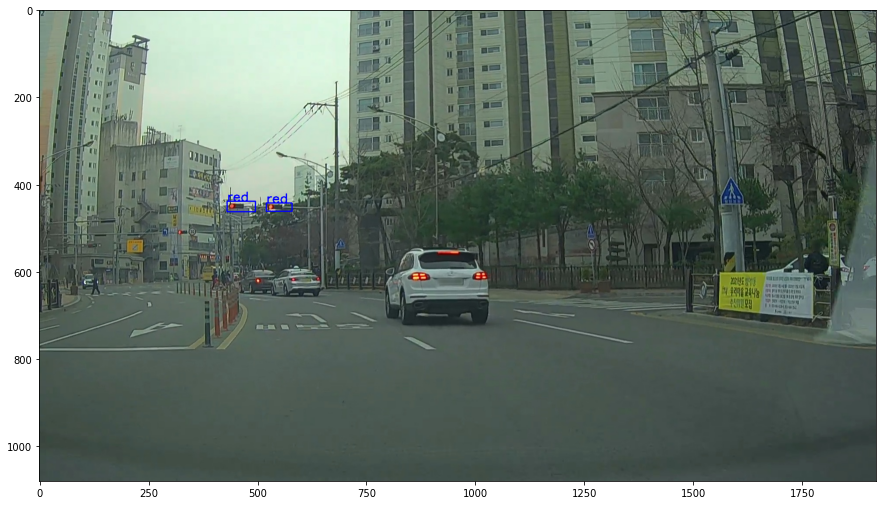

"\ncv2.imshow('image',img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\ncv2.waitKey(1)\n"

In [375]:
img = cv2.imread(paths+filename+'.jpg') 
font = cv2.FONT_HERSHEY_SIMPLEX 

for a,b,c in array:
    print(a,b,c)
    y,h,x,w = b
    w = w-x
    h = h-y
    text = c #+ str(x)+ '' +str(y)
    org = (x, y)
    
    cv2.rectangle(img,(x, y, w, h), 255, 2)
    cv2.putText(img, text, org, font, 1, (255, 0, 0), 2)

    

plt.figure(figsize = (15, 12))
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)
plt.show()


"""
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)
"""

------------------------------------------